<a href="https://colab.research.google.com/github/Ridzan12/Ridzan12/blob/main/Top_4_Indonesia_Bluechip_Stock_Analysis_Using_LSTM_Muhammad_Ridzan_Pahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Ridzan12/Ridzan12.git

Cloning into 'Ridzan12'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
# The library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
yf.pdr_override()

In [ ]:
# 4 Bluechip stocks in indonesia
tech_list = ['BBCA.JK',
             'TLKM.JK',
             'ICBP.JK',
             'ASII.JK'
             ]

# Set up End and Start times for data grab
tech_list = ['BBCA.JK',
             'TLKM.JK',
             'ICBP.JK',
             'ASII.JK'
             ]

end = datetime.now()

# Set the Start time from 2022
start = datetime(2022, 1, 1)

# Download from Yahoo Finance DataFrames for each stock
BBCA = yf.download('BBCA.JK', start, end)
TLKM = yf.download('TLKM.JK', start, end)
ICBP = yf.download('ICBP.JK', start, end)
ASII = yf.download('ASII.JK', start, end)

# Create a list of DataFrames and corresponding company names
company_list = [BBCA, TLKM, ICBP, ASII]
company_name = ["BCA", "TELKOM", "INDOFOOD", "ASTRA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
stk = pd.concat(company_list, axis=0)
stk.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-01-03,7325.0,7400.0,7300.0,7325.0,7045.549805,54287400,BCA
2022-01-04,7325.0,7450.0,7325.0,7400.0,7117.688477,70624000,BCA
2022-01-05,7450.0,7525.0,7375.0,7450.0,7165.780762,76164900,BCA
2022-01-06,7500.0,7525.0,7425.0,7475.0,7189.827148,63657100,BCA
2022-01-07,7550.0,7700.0,7500.0,7650.0,7358.150879,143433300,BCA


In [ ]:
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424 entries, 2022-01-03 to 2023-10-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          424 non-null    float64
 1   High          424 non-null    float64
 2   Low           424 non-null    float64
 3   Close         424 non-null    float64
 4   Adj Close     424 non-null    float64
 5   Volume        424 non-null    int64  
 6   company_name  424 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 26.5+ KB


# Closing Price

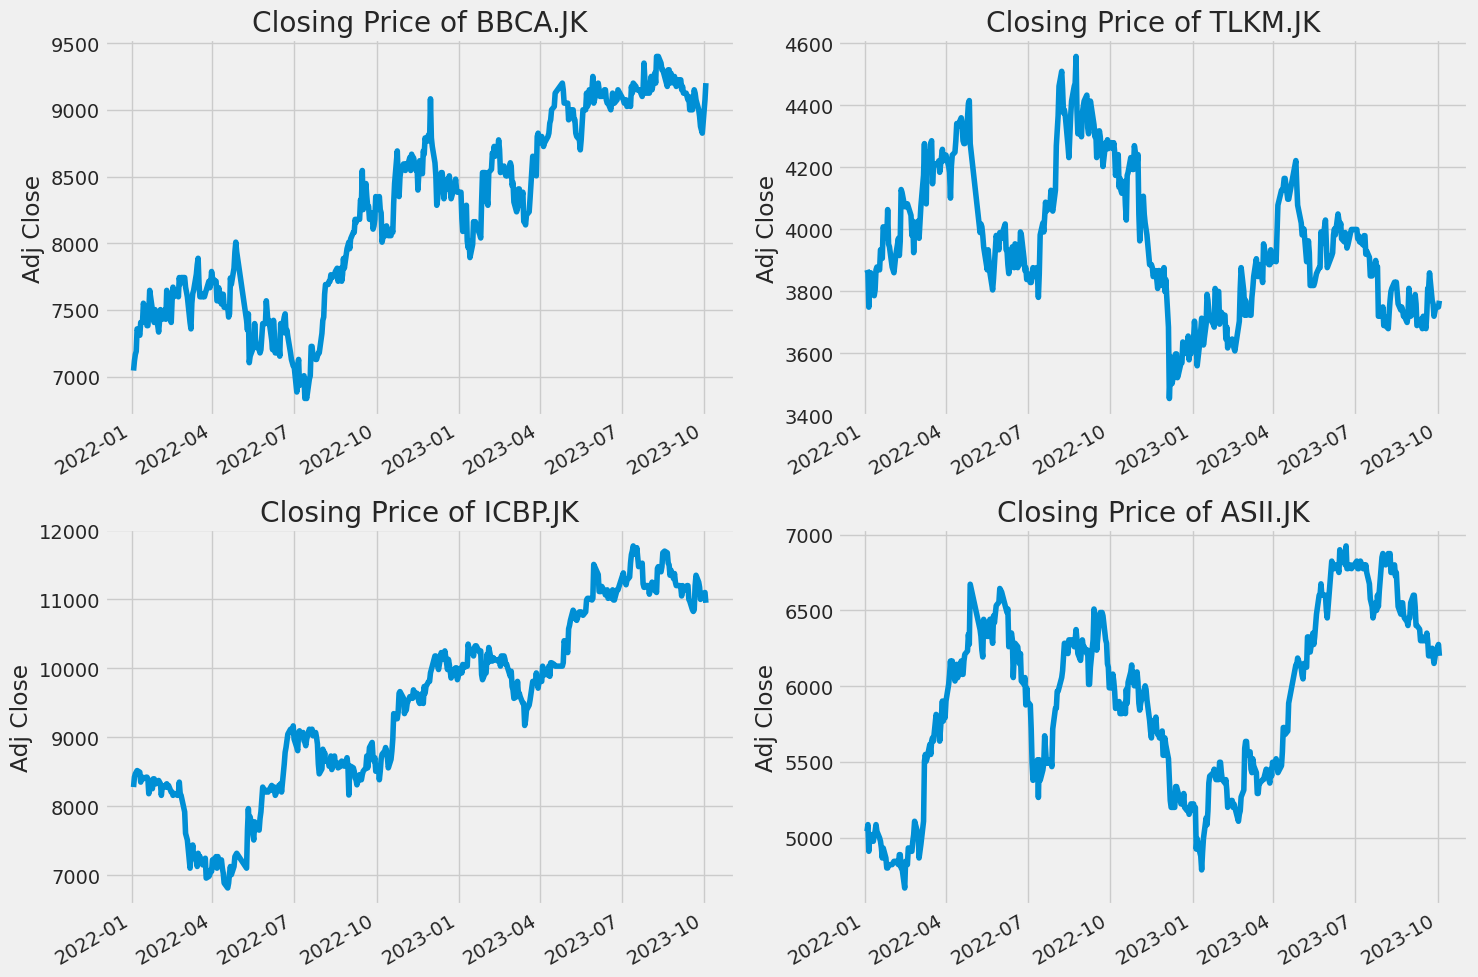

In [ ]:
# Create closing price line chart
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

**Insights :** Closing prices of BCA, INDOFOOD, and ASTRA stocks have increased from 2022. This shows the growth in stock value over the 2022 period. While TELKOM stock have decreased.

# Sales Volume

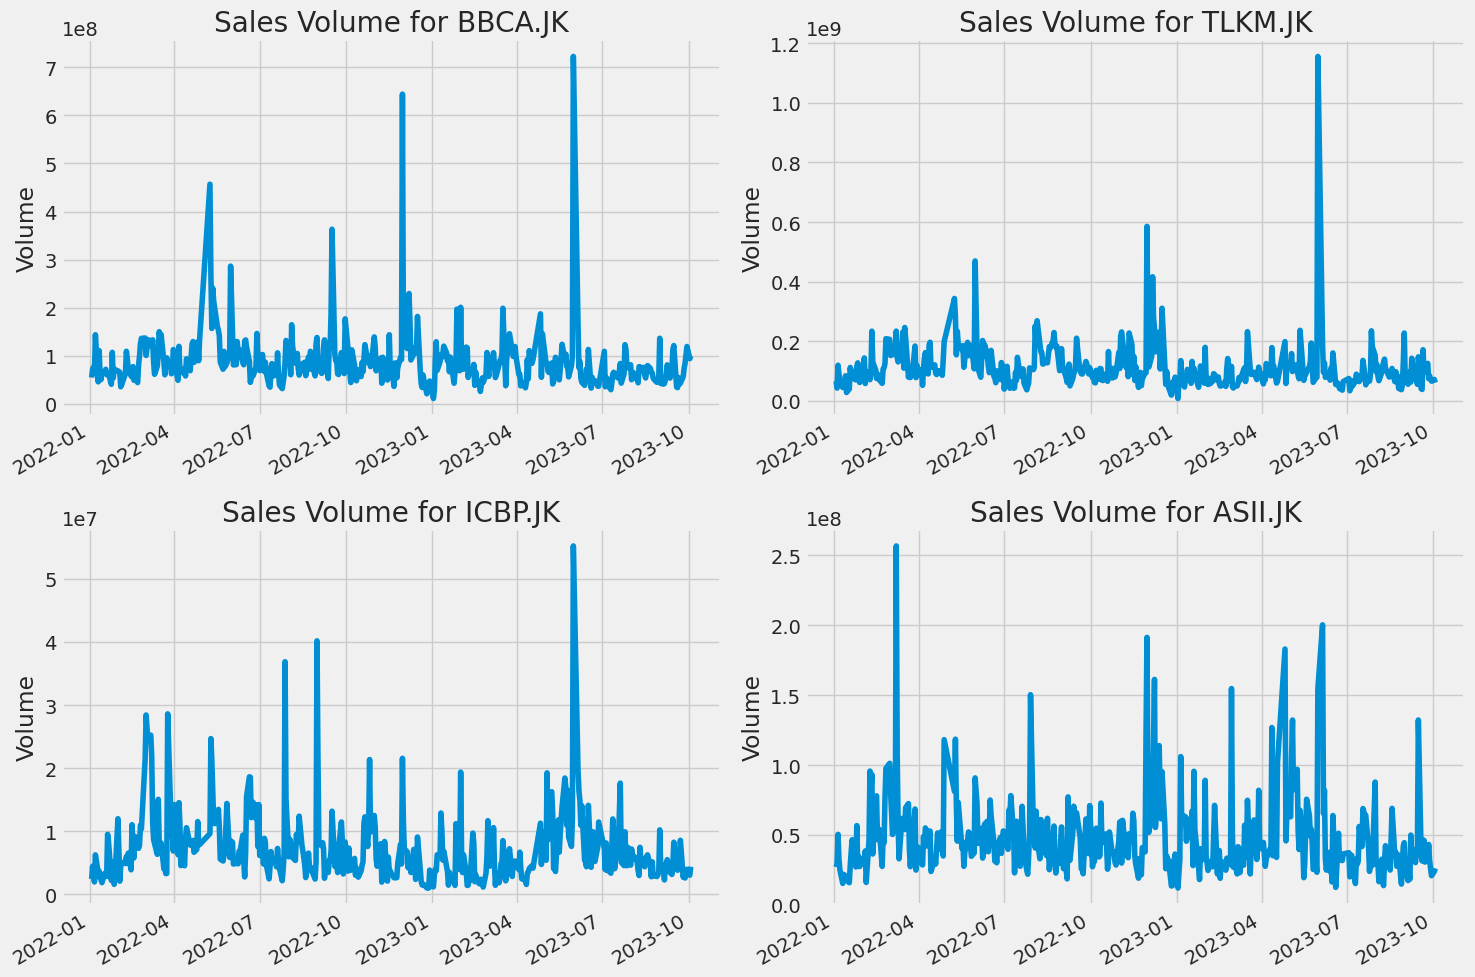

In [ ]:
# Create sales volume plot
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

**Insight :** High sales volume can affect stock price moving average so that the stock price falls.
ex: in August 2023, the sales volume was high, causing the stock to fall at a certain price.

# Moving Average

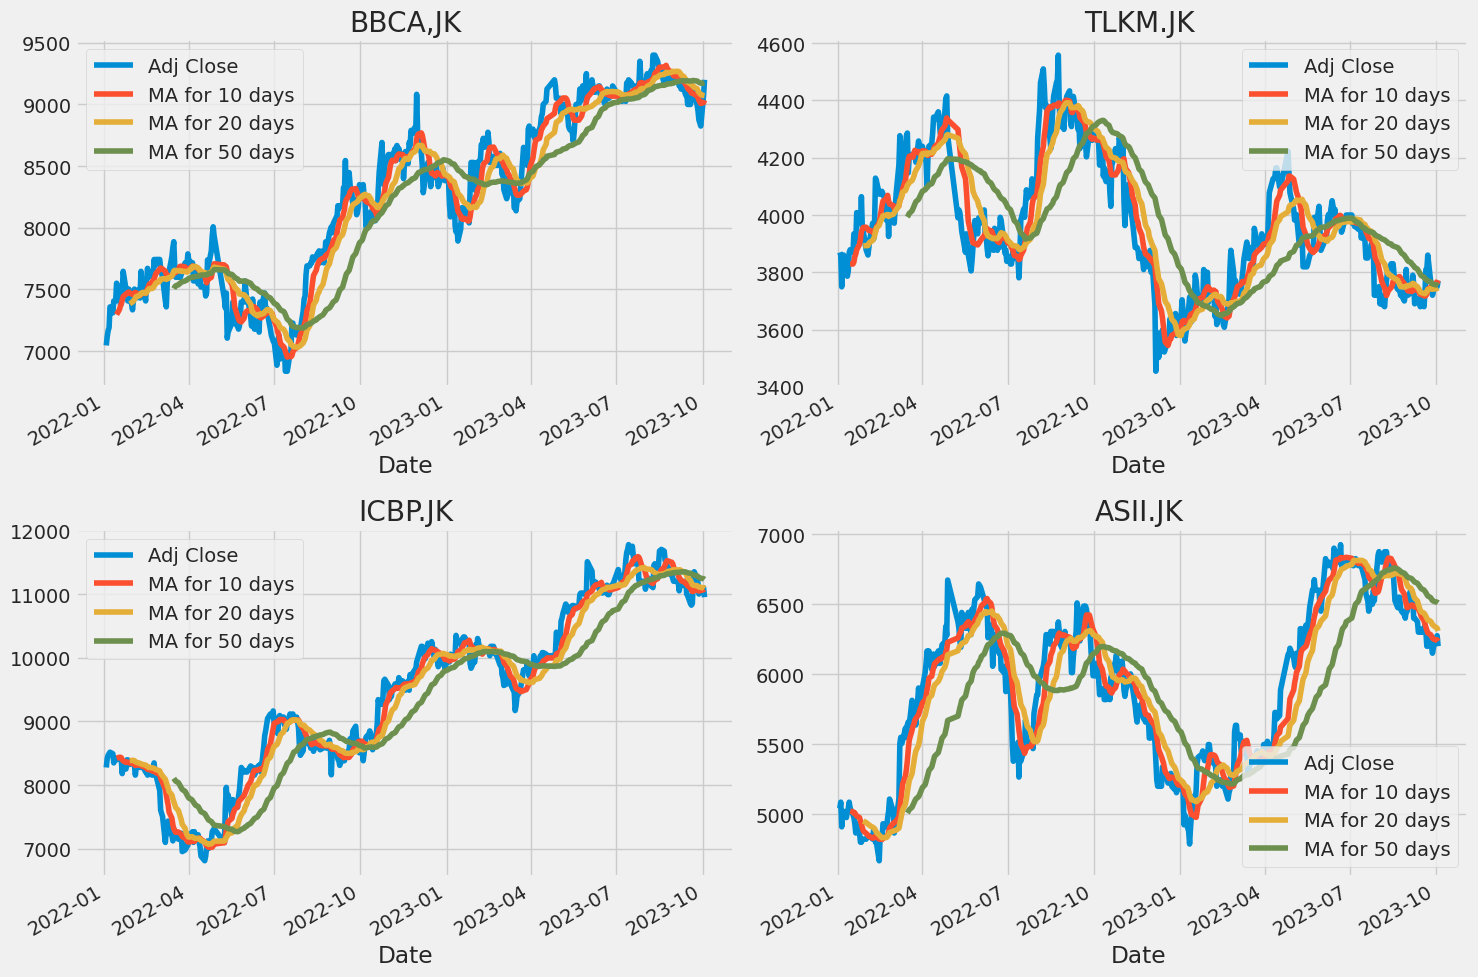

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBCA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('BBCA,JK')

TLKM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TLKM.JK')

ICBP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ICBP.JK')

ASII[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('ASII.JK')

fig.tight_layout()

**Insights :** Seen from the moving average for 10/20 days, it can be seen when the trend movement is bullish or bearish. So far BCA has the most bullish trend, suitable for long-term investment.

# Daily Return

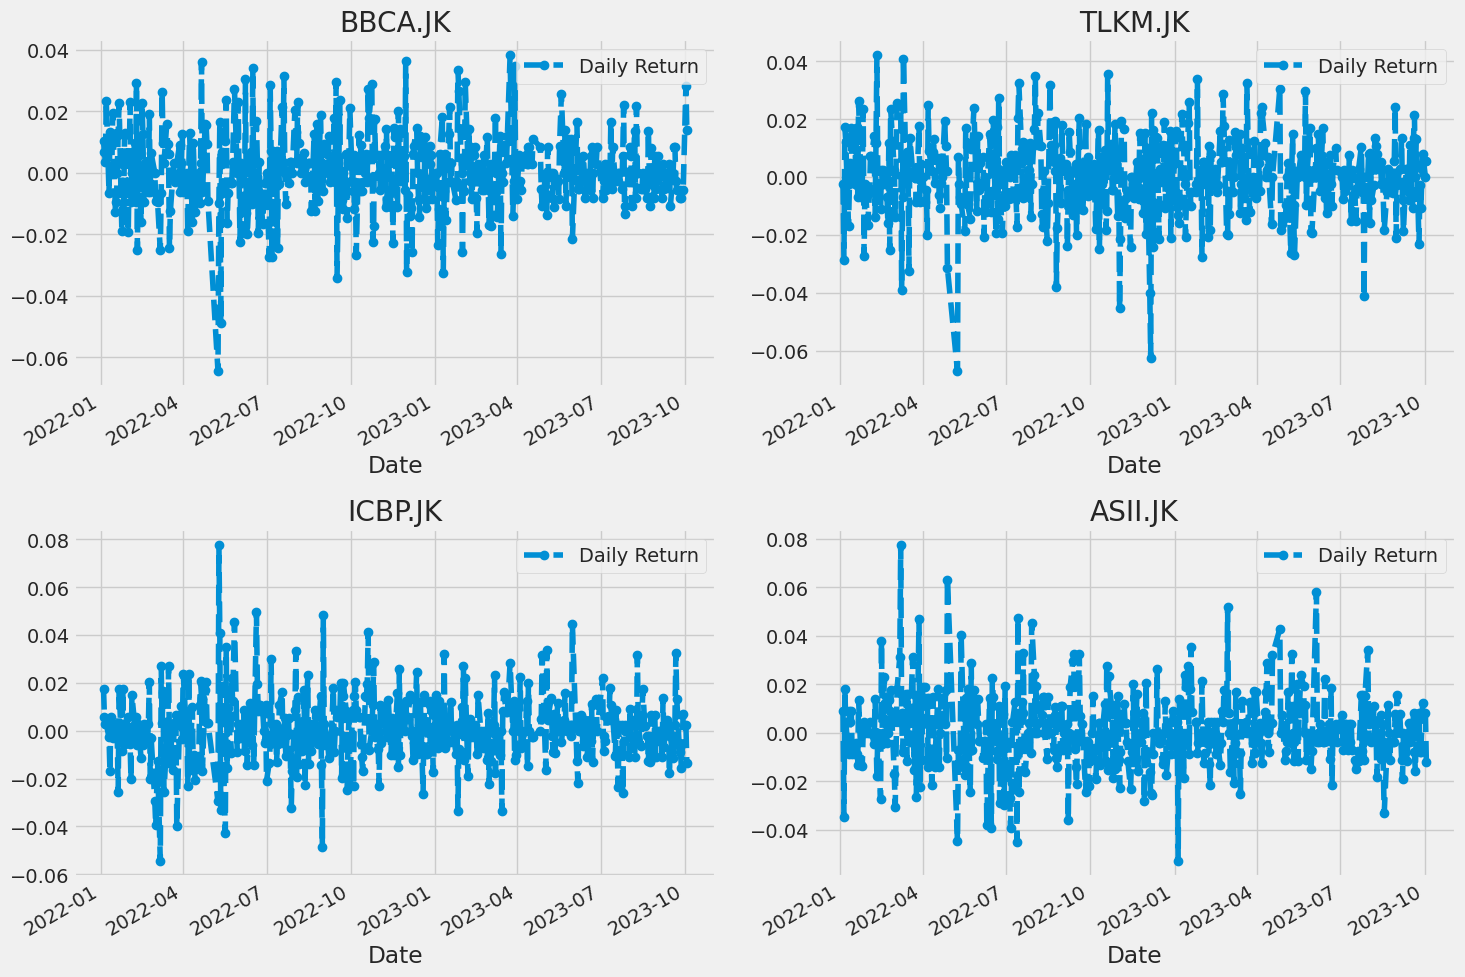

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBCA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('BBCA.JK')

TLKM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TLKM.JK')

ICBP['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('ICBP.JK')

ASII['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ASII.JK')

fig.tight_layout()

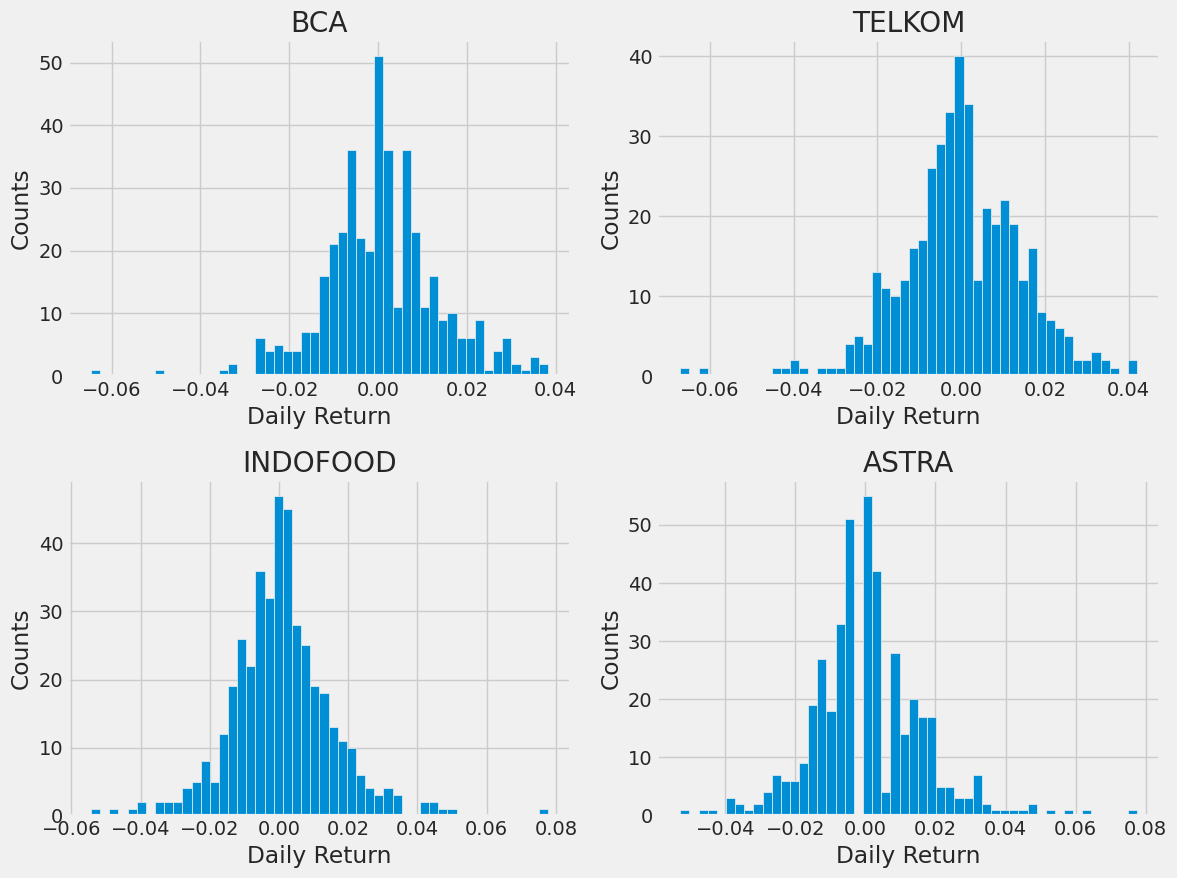

In [ ]:
# Create histogram to find standard deviation
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Calculate the standard deviation for each stock
std_dev_BBCA = BBCA['Daily Return'].std()
std_dev_TLKM = TLKM['Daily Return'].std()
std_dev_ICBP = ICBP['Daily Return'].std()
std_dev_ASII = ASII['Daily Return'].std()

# Print the result
print(f"standard deviation BCA: {std_dev_BBCA:.4f}")
print(f"standard deviation TELKOM: {std_dev_TLKM:.4f}")
print(f"standard deviation INDOFOOD: {std_dev_ICBP:.4f}")
print(f"standard deviation ASTRA: {std_dev_ASII:.4f}")

standard deviation BCA: 0.0131
standard deviation TELKOM: 0.0145
standard deviation INDOFOOD: 0.0148
standard deviation ASTRA: 0.0162


**Insight :** The average standard deviation of the histogram above is 0.01465. this indicates that the four stocks have low daily volatility and are safe and stable for investment.

# Correlation Between Stocks Closing Prices

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_stk = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_stk.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,ASII.JK,BBCA.JK,ICBP.JK,TLKM.JK
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,0.008734,0.010239,0.017391,-0.002392
2022-01-05,-0.034632,0.006757,0.005698,-0.028777
2022-01-06,0.017937,0.003356,0.002833,0.017284
2022-01-07,0.004405,0.023411,0.002825,0.012136


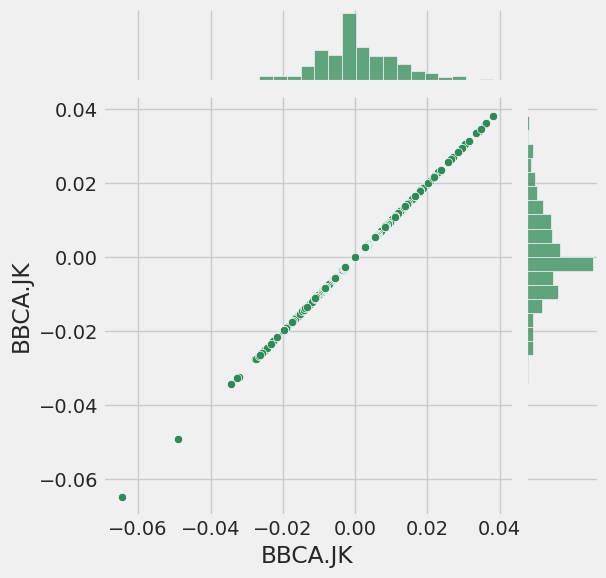

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='BBCA.JK', y='BBCA.JK', data=tech_rets, kind='scatter', color='seagreen')

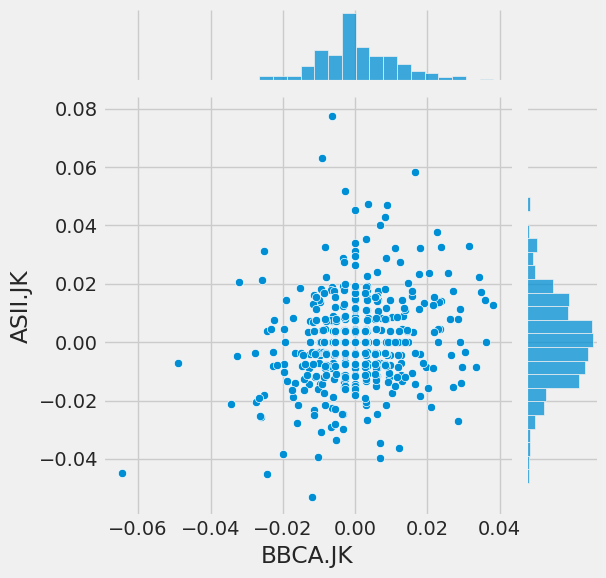

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='BBCA.JK', y='ASII.JK', data=tech_rets, kind='scatter')

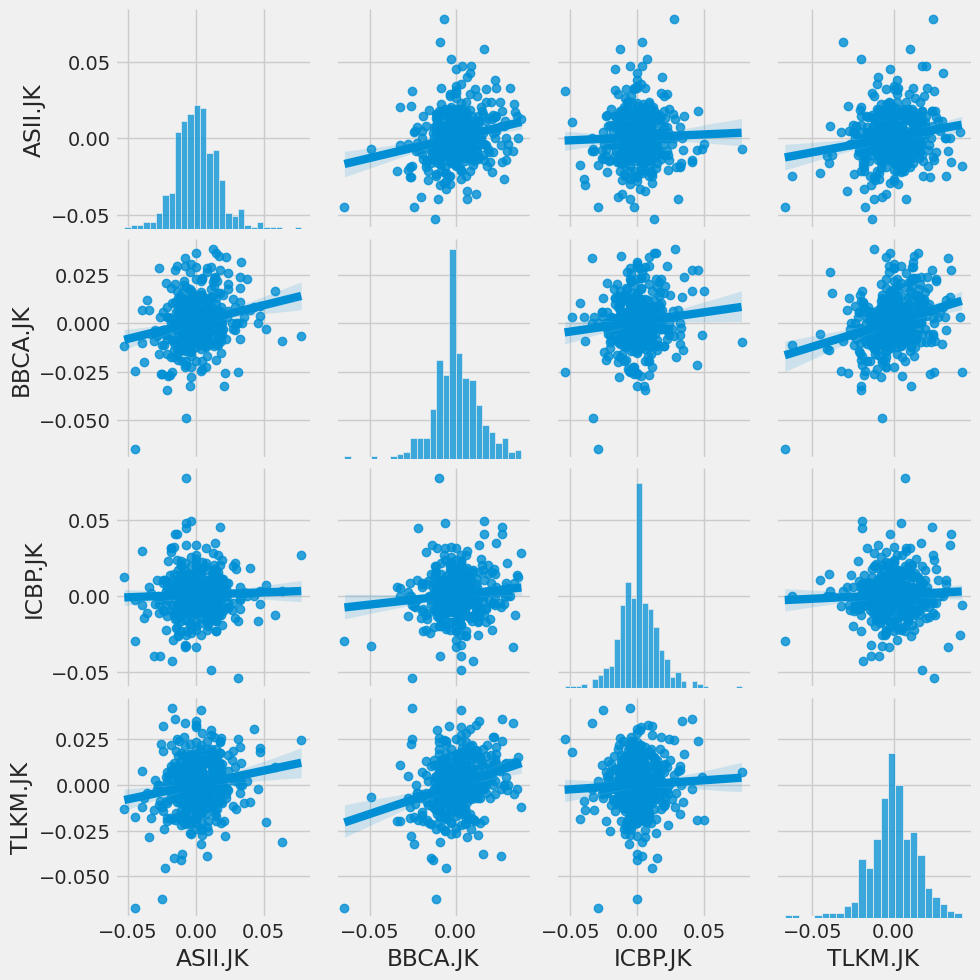

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

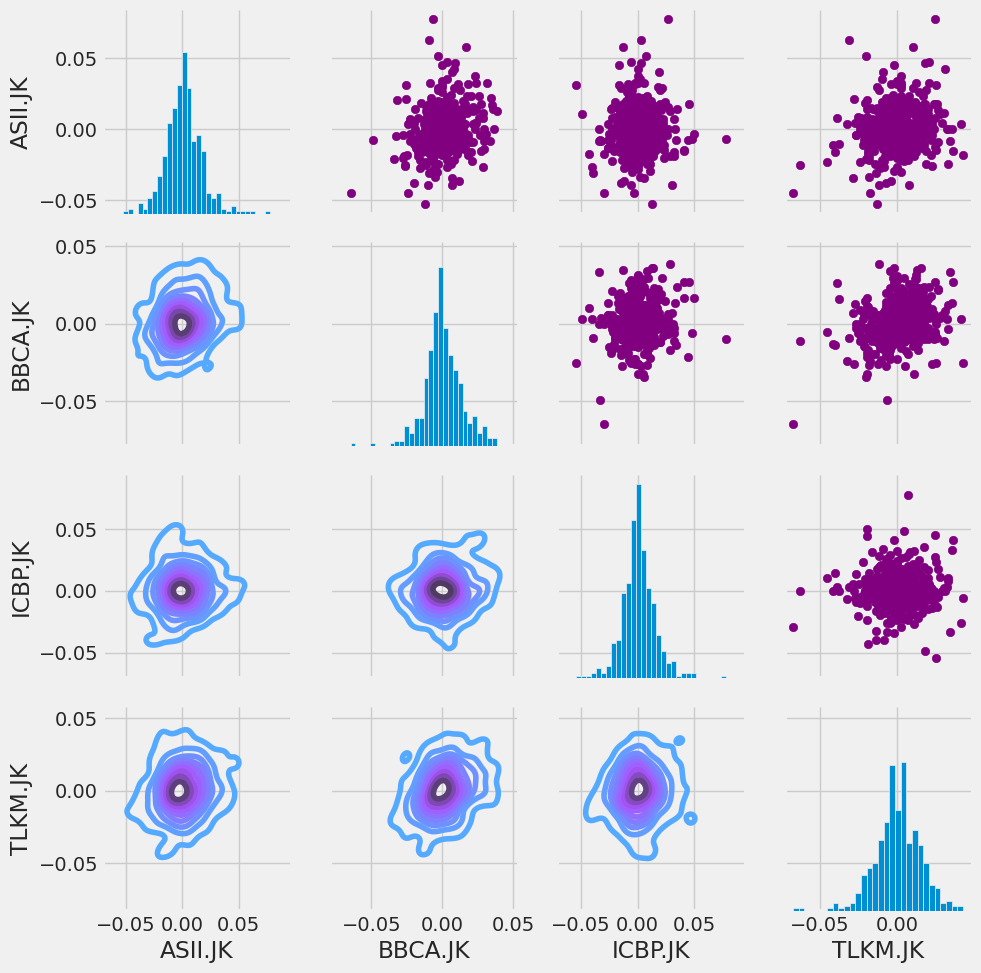

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

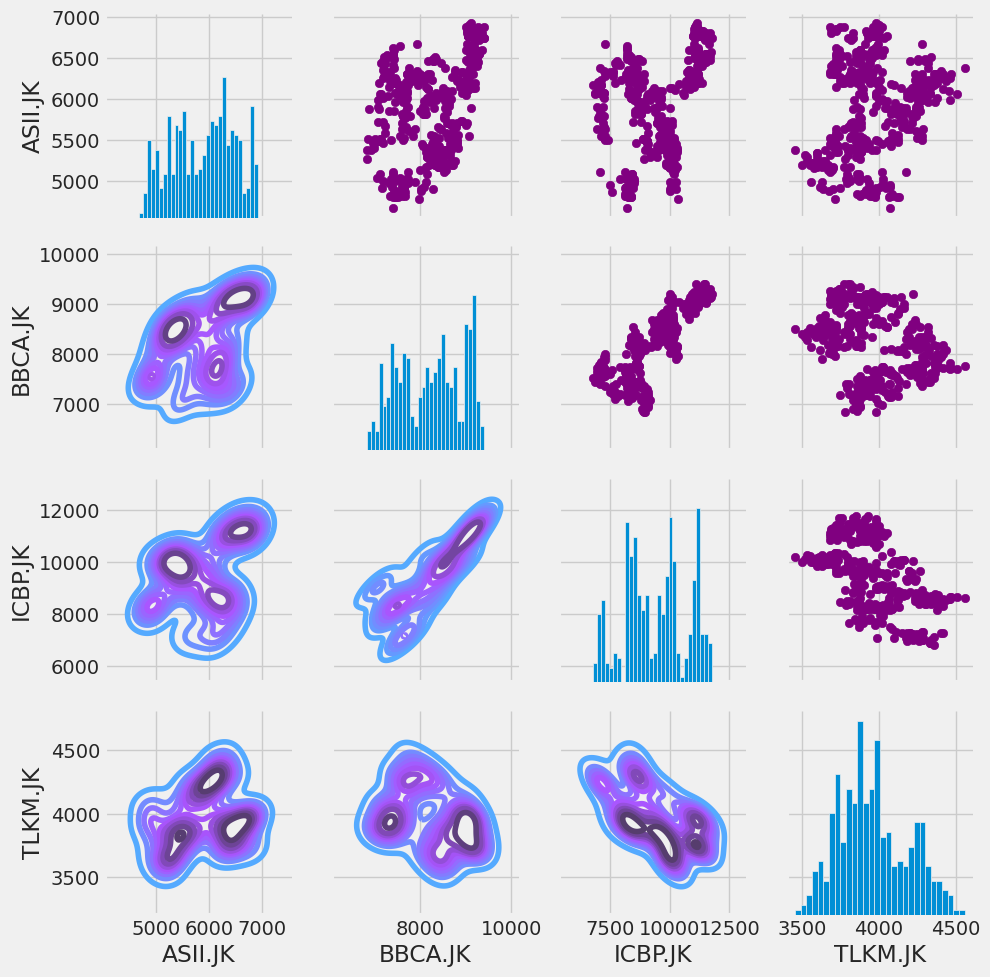

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_stk)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

**Insight :** From the correlation plot above shows that 4 stocks do not have a positive correlation. this is because the shares are engaged in different fields so that they affect the daily return movement of each stock.


# Risk and Expected Returns

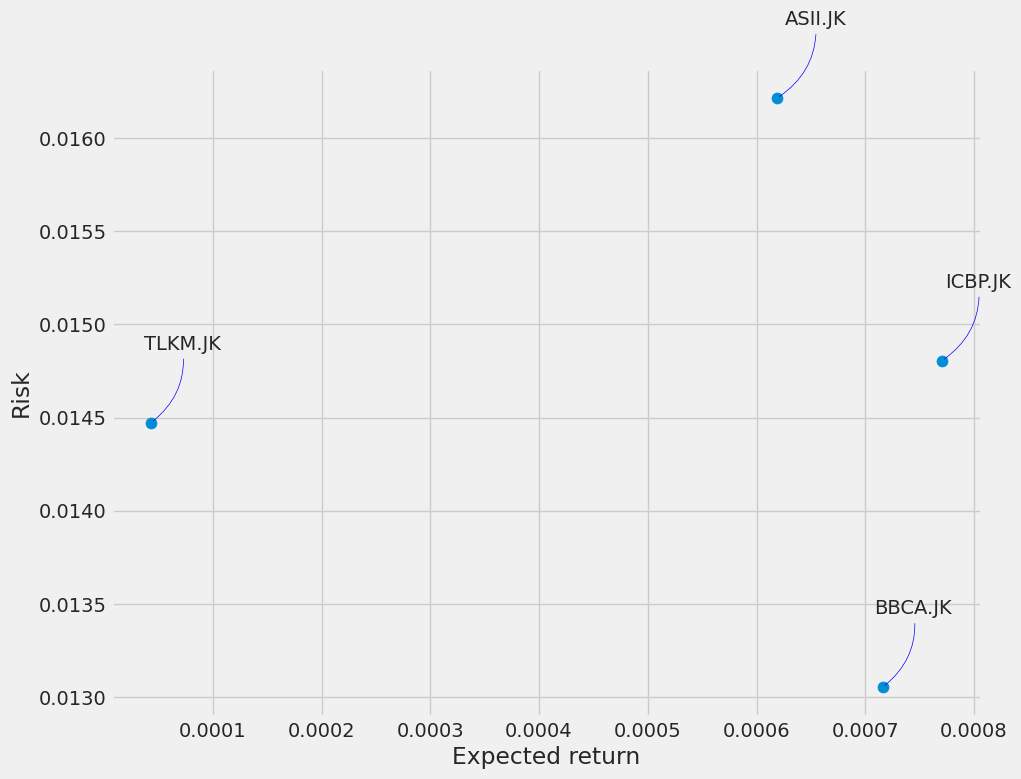

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**Insights**

**Risk** (lower is better)

**Expected Return** (the more to the right is better)


Telkom   : Medium risk and low return.

Astra    : High risk and high return.

BCA      : Low risk and high return.

Indofood : Medium risk and high return.

From the explanation above, I cannot give recommendations on which stocks to invest in. because money is very sensitive.



